<a href="https://colab.research.google.com/github/Gcango/Projecto_3/blob/main/Analise_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A abordagem aplicada a este conjunto de dados extraidos de uma base BD ad Empresa Yetuki Lda, relacionada com vendas de produtos diversos, permitiu a compreensão mais profunda dos fatores que influenciam a demanda neste estlablecimento bem como  forneceu informações valiosas para orientar as estratégias para as melhores tomadas de decisão. Este projecto adotou a seguinte metodologia:
Coleta de Dados: Reunir dados históricos de vendas, produtos e outros;
Análise Exploratória: Explorar os dados para entender as distribuições, tendências e possíveis relações entre as variáveis.
Interpretação dos Resultados: Interpretar os coeficientes de regressão para entender o impacto relativo de cada variável independente sobre as vendas.
Tomada de Decisão: Utilizar os insights obtidos para tomar decisões estratégicas relacionadas à precificação, estratégias da Yetuki, visando maximizar as vendas e o desempenho geral do negócio.

In [102]:
!pip install -U ydata_profiling[notebook]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=43f06c5d46a35183521369451c800e6dd86f9e74ba9998cf74378d1bdff6dab2
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [2]:
dados = pd.read_excel("/content/Base_de_dados.xlsx")

In [3]:
dados.head()

,SalesOrderNumber,OrderDate,ProductKey,ResellerKey,EmployeeKey,SalesTerritoryKey,Quantity,Unit Price,Sales,Cost,Country,Continent,Product,Color,Subcategory,Category
0,SO43897,"Friday, August 25, 2017",235,312,282,4,2,28.84,57.68,63.45,United States,North America,"Long-Sleeve Logo Jersey, XL",Multi,Jerseys,Clothing
1,SO43897,"Friday, August 25, 2017",351,312,282,4,2,2024.99,4049.98,3796.19,United States,North America,"Mountain-100 Black, 48",Black,Mountain Bikes,Bikes
2,SO43897,"Friday, August 25, 2017",348,312,282,4,2,2024.99,4049.98,3796.19,United States,North America,"Mountain-100 Black, 38",Black,Mountain Bikes,Bikes
3,SO43897,"Friday, August 25, 2017",232,312,282,4,2,28.84,57.68,63.45,United States,North America,"Long-Sleeve Logo Jersey, L",Multi,Jerseys,Clothing
4,SO44544,"Saturday, November 18, 2017",292,312,282,4,2,818.70,1637.40,1413.62,United States,North America,"HL Mountain Frame - Silver, 48",Silver,Mountain Frames,Components


In [4]:
dados.columns

Index(['SalesOrderNumber', 'OrderDate', 'ProductKey', 'ResellerKey',
       'EmployeeKey', 'SalesTerritoryKey', 'Quantity', 'Unit Price', 'Sales',
       'Cost', 'Country', 'Continent', 'Product', 'Color', 'Subcategory',
       'Category'],
      dtype='object')

In [5]:
print("O dataset tem linhas: ", dados.shape[0])
print("O dataset tem Colunas: ", dados.shape[1])

O dataset tem linhas:  57851
O dataset tem Colunas:  16


In [6]:
dados.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57851 entries, 0 to 57850
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SalesOrderNumber   57851 non-null  object 
 1   OrderDate          57851 non-null  object 
 2   ProductKey         57851 non-null  int64  
 3   ResellerKey        57851 non-null  int64  
 4   EmployeeKey        57851 non-null  int64  
 5   SalesTerritoryKey  57851 non-null  int64  
 6   Quantity           57851 non-null  int64  
 7   Unit Price         57851 non-null  float64
 8   Sales              57851 non-null  float64
 9   Cost               57851 non-null  float64
 10  Country            57851 non-null  object 
 11  Continent          57851 non-null  object 
 12  Product            57851 non-null  object 
 13  Color              52998 non-null  object 
 14  Subcategory        57851 non-null  object 
 15  Category           57851 non-null  object 
dtypes: float64(3), int64(5

In [7]:
dados.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57851 entries, 0 to 57850
Columns: 16 entries, SalesOrderNumber to Category
dtypes: float64(3), int64(5), object(8)
memory usage: 7.1+ MB


In [8]:
dados.dtypes

SalesOrderNumber      object
OrderDate             object
ProductKey             int64
ResellerKey            int64
EmployeeKey            int64
SalesTerritoryKey      int64
Quantity               int64
Unit Price           float64
Sales                float64
Cost                 float64
Country               object
Continent             object
Product               object
Color                 object
Subcategory           object
Category              object
dtype: object

In [9]:
dados.describe()

,ProductKey,ResellerKey,EmployeeKey,SalesTerritoryKey,Quantity,Unit Price,Sales,Cost
count,57851.000000,57851.000000,57851.000000,57851.000000,57851.000000,57851.000000,57851.000000,57851.000000
mean,408.636705,340.742978,286.131735,4.554424,3.528271,446.388513,1336.938293,1323.210932
std,113.665645,205.493906,4.521832,2.412247,3.035766,521.880164,2150.408256,2169.787634
min,212.000000,1.000000,272.000000,1.000000,1.000000,1.330000,1.370000,0.860000
25%,326.000000,166.000000,283.000000,3.000000,2.000000,34.930000,127.800000,97.150000
50%,401.000000,327.000000,285.000000,4.000000,3.000000,214.240000,469.790000,461.440000
75%,491.000000,514.000000,290.000000,6.000000,4.000000,672.290000,1488.540000,1510.300000
max,606.000000,701.000000,296.000000,10.000000,44.000000,2146.960000,30993.040000,38530.390000


In [10]:
for column in dados.columns:
    print(f"{column}: Number of unique values {dados[column].nunique()}")
    print("==========================================================")

SalesOrderNumber: Number of unique values 3616
OrderDate: Number of unique values 990
ProductKey: Number of unique values 334
ResellerKey: Number of unique values 632
EmployeeKey: Number of unique values 17
SalesTerritoryKey: Number of unique values 10
Quantity: Number of unique values 41
Unit Price: Number of unique values 230
Sales: Number of unique values 1406
Cost: Number of unique values 1430
Country: Number of unique values 6
Continent: Number of unique values 3
Product: Number of unique values 250
Color: Number of unique values 8
Subcategory: Number of unique values 33
Category: Number of unique values 4


In [11]:
dados["OrderDate"]= pd.to_datetime(dados['OrderDate'])

In [12]:
dados.head(2)

,SalesOrderNumber,OrderDate,ProductKey,ResellerKey,EmployeeKey,SalesTerritoryKey,Quantity,Unit Price,Sales,Cost,Country,Continent,Product,Color,Subcategory,Category
0,SO43897,2017-08-25,235,312,282,4,2,28.84,57.68,63.45,United States,North America,"Long-Sleeve Logo Jersey, XL",Multi,Jerseys,Clothing
1,SO43897,2017-08-25,351,312,282,4,2,2024.99,4049.98,3796.19,United States,North America,"Mountain-100 Black, 48",Black,Mountain Bikes,Bikes


In [13]:
#a) - Quais foram as tendências de vendas ao longo do tempo (mensal)

In [14]:
venda_mensal = dados.resample('M', on='OrderDate')['Sales'].sum()

In [15]:
venda_mensal

OrderDate
2017-07-31     489328.40
2017-08-31    1540072.02
2017-09-30    1166332.45
2017-10-31     844832.71
2017-11-30    2325754.91
2017-12-31    1703435.09
2018-01-31     713229.54
2018-02-28    1900794.46
2018-03-31    1455280.27
2018-04-30     883010.98
2018-05-31    2269719.87
2018-06-30     950663.90
2018-07-31    2411558.85
2018-08-31    3615914.46
2018-09-30    2893701.61
2018-10-31    1804176.93
2018-11-30    3054996.72
2018-12-31    2188205.66
2019-01-31    1318592.01
2019-02-28    2386073.19
2019-03-31    1564294.92
2019-04-30    1868433.35
2019-05-31    2882637.58
2019-06-30    1990249.25
2019-07-31    2727979.03
2019-08-31    4302463.14
2019-09-30    4150879.35
2019-10-31    2293200.43
2019-11-30    3489052.03
2019-12-31    3513587.30
2020-01-31    1664187.50
2020-02-29    2701954.05
2020-03-31    2741182.95
2020-04-30    2211885.83
2020-05-31    3325556.46
Freq: M, Name: Sales, dtype: float64

In [16]:
#b) -  Quais foram as tendências de vendas ao longo do tempo (sazonal)

In [17]:
media_venda_mensal = dados.groupby(dados['OrderDate'].dt.month)['Sales'].mean()

In [18]:
media_venda_mensal

OrderDate
1     1347.924526
2     1517.329939
3     1424.167649
4     1327.093626
5     1353.218501
6     1168.420004
7     1321.020014
8     1260.622367
9     1255.875407
10    1330.339184
11    1395.720482
12    1330.918054
Name: Sales, dtype: float64

In [19]:
#c) - Quais foram os picos de vendas e períodos de baixo desempenho
# Podemos calcular as vendas máximas e mínimas por mês

In [20]:
max_venda_mensal = dados.groupby(dados['OrderDate'].dt.month)['Sales'].max()
min_venda_mensal = dados.groupby(dados['OrderDate'].dt.month)['Sales'].min()

In [21]:
print("\nVendas máximas por mês:")
print(max_venda_mensal)


Vendas máximas por mês:
OrderDate
1     16319.92
2     21691.83
3     18224.91
4     20195.84
5     23489.88
6     13089.40
7     27536.04
8     27607.86
9     25515.00
10    30993.04
11    24913.56
12    23663.88
Name: Sales, dtype: float64


In [22]:
print("\nVendas mínimo por mês:")
print(min_venda_mensal)


Vendas mínimo por mês:
OrderDate
1     2.74
2     1.37
3     1.37
4     2.74
5     1.37
6     5.19
7     1.37
8     1.37
9     1.37
10    2.74
11    2.74
12    1.37
Name: Sales, dtype: float64


In [23]:
##e) - Mostra a Comparação entre vendas de diferentes períodos temporais
# Podemos comparar as vendas entre diferentes anos

In [24]:
comp_vendas_ano = dados.groupby(dados['OrderDate'].dt.year)['Sales'].sum()

In [25]:
print("\nComparação de vendas entre diferentes anos:")
print(comp_vendas_ano)


Comparação de vendas entre diferentes anos:
OrderDate
2017     8069755.58
2018    24141253.25
2019    32487441.58
2020    12644766.79
Name: Sales, dtype: float64


In [26]:
#f) - Quais Produtos podemos considerar mais vendidos

In [27]:
top_produtos = dados.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)

In [28]:
# Visualizar os 10 produtos mais vendidos
print("Top 10 produtos mais vendidos:")
print(top_produtos)

Top 10 produtos mais vendidos:
Product
Mountain-200 Black, 38     2944665.88
Mountain-200 Black, 42     2517355.08
Mountain-200 Silver, 38    2240091.34
Mountain-200 Silver, 42    2108685.83
Mountain-200 Silver, 46    2038938.83
Mountain-200 Black, 46     1845368.54
Road-250 Black, 44         1832750.05
Road-250 Black, 48         1586672.94
Road-350-W Yellow, 48      1283443.06
Touring-1000 Blue, 60      1263913.32
Name: Sales, dtype: float64


In [29]:
#g) - Como esta a distribuição das vendas em relação a categoria, subcategoria e cor

In [30]:
vendas_categoria = dados.groupby('Category')['Sales'].sum()
vendas_subcategoria = dados.groupby('Subcategory')['Sales'].sum()
vendas_cor = dados.groupby('Color')['Sales'].sum()

In [31]:
# Visualizar a distribuição de vendas por categoria, subcategoria e cor
print("\nDistribuição de vendas por categoria:")
print(vendas_categoria)
print("\nDistribuição de vendas por subcategoria:")
print(vendas_subcategoria)
print("\nDistribuição de vendas por cor:")
print(vendas_cor)


Distribuição de vendas por categoria:
Category
Accessories      532464.09
Bikes          63879394.16
Clothing        1704984.05
Components     11226374.90
Name: Sales, dtype: float64

Distribuição de vendas por subcategoria:
Subcategory
Bib-Shorts             167171.79
Bike Racks             175365.60
Bottles and Cages        6885.93
Bottom Brackets         44444.93
Brakes                  60183.15
Caps                    30658.42
Chains                   8363.00
Cleaners                10179.94
Cranksets              183123.06
Derailleurs             61629.35
Forks                   77966.80
Gloves                 207372.85
Handlebars             161990.56
Headsets                61134.40
Helmets                250209.76
Hydration Packs         59218.45
Jerseys                549933.91
Locks                   16249.00
Mountain Bikes       25690513.86
Mountain Frames       4493533.42
Pedals                 133777.98
Pumps                   13524.30
Road Bikes           28681899.48
Roa

In [32]:
#h) - Qual foi o desempenho dos diferentes produtos da BD
# Podemos calcular as vendas médias por produto

In [33]:
media_vendas_produtos = dados.groupby('Product')['Sales'].mean().sort_values(ascending=False).head(20)

In [34]:
print("\nVendas médias por produto:")
print(media_vendas_produtos)


Vendas médias por produto:
Product
Mountain-100 Black, 44     6424.337363
Mountain-100 Black, 38     6402.983081
Mountain-100 Black, 42     6125.872732
Mountain-100 Silver, 38    5827.441585
Mountain-100 Silver, 42    5685.949832
Mountain-100 Black, 48     5665.799839
Mountain-100 Silver, 44    5594.635707
Mountain-100 Silver, 48    5234.962560
Road-250 Red, 44           4990.764000
Touring-1000 Blue, 60      4861.205077
Mountain-200 Silver, 38    4706.074244
Mountain-200 Black, 42     4661.768667
Road-150 Red, 48           4651.746667
Mountain-200 Black, 38     4608.240814
Mountain-200 Silver, 42    4574.155813
Touring-1000 Blue, 46      4523.793712
Mountain-200 Silver, 46    4500.968720
Road-250 Red, 48           4429.770561
Mountain-200 Black, 46     4425.344221
Road-150 Red, 52           4406.917895
Name: Sales, dtype: float64


In [35]:
#i) - Quais os territórios de vendas foram mais lucrativos

In [36]:
dados.columns

Index(['SalesOrderNumber', 'OrderDate', 'ProductKey', 'ResellerKey',
       'EmployeeKey', 'SalesTerritoryKey', 'Quantity', 'Unit Price', 'Sales',
       'Cost', 'Country', 'Continent', 'Product', 'Color', 'Subcategory',
       'Category'],
      dtype='object')

In [37]:
vendas_territorio = dados.groupby('SalesTerritoryKey')['Sales'].sum().sort_values(ascending=False)

In [38]:
# Visualizar os territórios de vendas mais lucrativos
print("Territórios de vendas mais lucrativos:")
print(vendas_territorio)

Territórios de vendas mais lucrativos:
SalesTerritoryKey
4     17928423.10
6     13821416.96
1     11964502.45
3      7624656.86
5      7613973.55
2      6713671.39
7      4526327.69
10     3883042.96
8      1876177.39
9      1391024.85
Name: Sales, dtype: float64


In [39]:
dados['SalesTerritoryKey'].unique()

array([ 4,  6,  1,  3, 10,  7,  8,  5,  2,  9])

In [40]:
#j) - Como esta o desempho de vendas entre as regiões da BD
# Podemos calcular as vendas médias por território

In [41]:
media_vendas_territorio = dados.groupby("SalesTerritoryKey")['Sales'].mean()

In [42]:
# Visualizar as vendas médias por território
print("\nVendas médias por território:")
print(media_vendas_territorio)


Vendas médias por território:
SalesTerritoryKey
1     1606.836214
2     1196.732868
3     1379.529014
4     1397.818735
5     1326.014202
6     1264.076912
7     1322.714112
8     1117.437397
9      977.529761
10    1197.730709
Name: Sales, dtype: float64


In [43]:
# k) - Como calcular a margem de Lucro dessa BD

In [44]:
dados['Profit'] = dados['Sales'] - dados['Cost']
dados['Profit_Margin'] = (dados['Profit'] / dados['Sales']) * 100

In [45]:
# Visualizar as margens de lucro
print("Margens de lucro:")
print(dados[['Product', 'Profit_Margin']].sample(20))

Margens de lucro:
                              Product  Profit_Margin
23504       LL Road Frame - Black, 58      -1.136757
39680         Touring-3000 Yellow, 54     -38.132371
1188     ML Road Frame-W - Yellow, 38       7.498844
52000           Road-550-W Yellow, 40      -0.897706
53630         Mountain-200 Silver, 42       9.078370
14128         LL Road Frame - Red, 48       7.497652
19926          ML Mountain Rear Wheel      25.999153
26409    ML Road Frame-W - Yellow, 44       7.498844
24360                Road-150 Red, 48      -1.133230
50874                 Classic Vest, S      37.668416
11392          HL Mountain Handlebars      25.998476
52271      Long-Sleeve Logo Jersey, M     -28.352308
8404               Road-250 Black, 58      -0.897291
54318          ML Mountain Rear Wheel      26.002683
49871  HL Mountain Frame - Silver, 38       8.733358
21519         Mountain-500 Silver, 48       9.076964
31349          Mountain-300 Black, 44       7.647237
22899                Road-65

In [46]:
# Identificar os produtos mais lucrativos

In [47]:
produtos_lucrativos = dados.groupby("Product")['Profit'].sum().sort_values(ascending=False).head(10)

In [48]:
# Visualizar os produtos mais lucrativos
print("\nTop 10 produtos mais lucrativos:")
print(produtos_lucrativos)


Top 10 produtos mais lucrativos:
Product
Mountain-200 Black, 38            272773.86
Mountain-200 Black, 42            234485.77
Mountain-200 Silver, 38           210455.61
Mountain-200 Silver, 42           198461.78
Mountain-200 Silver, 46           193576.11
Mountain-200 Black, 46            174514.55
HL Mountain Frame - Silver, 38     93737.24
HL Mountain Frame - Black, 42      90867.77
Hitch Rack - 4-Bike                59350.80
HL Mountain Frame - Black, 38      50868.34
Name: Profit, dtype: float64


In [49]:
# Analisar a relação entre custos e vendas
# Podemos criar um gráfico de dispersão para visualizar a relação entre custos e vendas

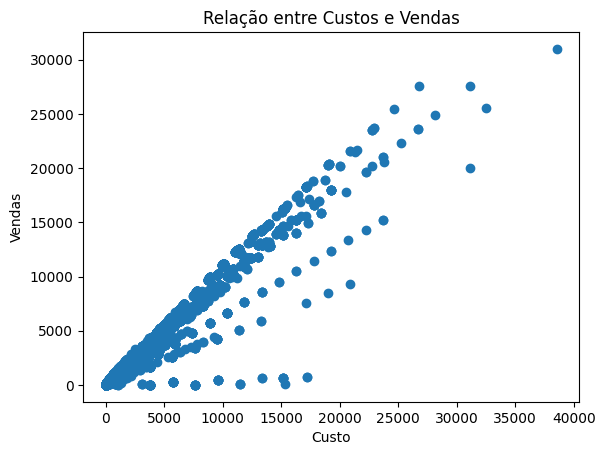

In [50]:
plt.scatter(dados['Cost'], dados['Sales'])
plt.xlabel('Custo')
plt.ylabel('Vendas')
plt.title('Relação entre Custos e Vendas')
plt.show()

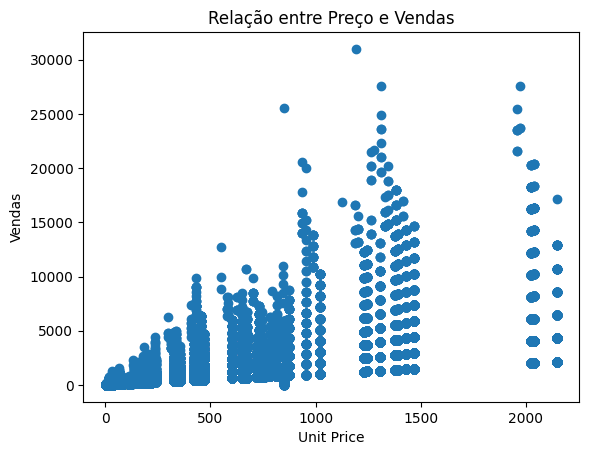

In [87]:
plt.scatter(dados['Unit Price'], dados['Sales'])
plt.xlabel('Unit Price')
plt.ylabel('Vendas')
plt.title('Relação entre Preço e Vendas')
plt.show()

In [51]:
top_revendedores = dados.groupby('ResellerKey')['Sales'].sum().sort_values(ascending=False).head(10)

In [52]:
# Visualizar os principais resellers
print("Top 10 resellers com melhores vendas:")
print(top_revendedores)

Top 10 resellers com melhores vendas:
ResellerKey
697    876702.53
328    817125.03
514    803767.27
170    773398.22
678    758432.73
433    741360.41
155    736865.30
227    735233.10
166    731634.54
146    724740.34
Name: Sales, dtype: float64


In [53]:
# Identificar os funcionários com melhores vendas

In [54]:
top_funcionario = dados.groupby('EmployeeKey')['Sales'].sum().sort_values(ascending=False).head(20)

In [55]:
# Visualizar os funcionários com melhores vendas
print("\nTop 10 funcionários com melhores vendas:")
print(top_funcionario)


Top 10 funcionários com melhores vendas:
EmployeeKey
282    10105300.52
283     9748189.01
281     8943724.48
291     8096612.95
285     6951495.29
287     6237797.33
288     5525270.26
292     4427856.45
289     3607902.61
284     3482736.49
286     3186712.14
293     2184211.15
295     1679641.53
296     1216916.52
272     1037173.72
290      737568.42
294      174108.33
Name: Sales, dtype: float64


In [56]:
# Analisar a eficácia dos canais de distribuição
# Podemos comparar as vendas por canal de distribuição (reseller vs. employee)

In [57]:
vendas_canal = dados.groupby("ResellerKey")['Sales'].sum().reset_index().rename(columns={'ResellerKey': 'Channel'})
vendas_canal['Channel Type'] = 'Reseller'

vendas_func = dados.groupby("EmployeeKey")['Sales'].sum().reset_index().rename(columns={'EmployeeKey': 'Channel'})
vendas_func['Channel Type'] = 'EmployeeKey'


vendas_canal = pd.concat([vendas_canal, vendas_func])

In [58]:
vendas_canal

,Channel,Sales,Channel Type
0,1,85177.04,Reseller
1,2,25204.31,Reseller
2,3,336451.79,Reseller
3,4,586741.66,Reseller
4,5,77174.62,Reseller
...,...,...,...
12,292,4427856.45,EmployeeKey
13,293,2184211.15,EmployeeKey
14,294,174108.33,EmployeeKey
15,295,1679641.53,EmployeeKey


In [59]:
# Identificar os países com maior volume de vendas

In [61]:
vendas_pais = dados.groupby("Country")["Sales"].sum().sort_values(ascending=False)

In [62]:
print("Países com maior volume de vendas:")
print(vendas_pais)

Países com maior volume de vendas:
Country
United States     51845227.35
Canada            13821416.96
France             4526327.69
United Kingdom     3883042.96
Germany            1876177.39
Australia          1391024.85
Name: Sales, dtype: float64


In [59]:
# Identificar os continentes com maior volume de vendas

In [63]:
vendas_continente = dados.groupby("Continent")["Sales"].sum().sort_values(ascending=False)

In [64]:
# Visualizar os continentes com maior volume de vendas
print("\nContinentes com maior volume de vendas:")
print(vendas_continente)


Continentes com maior volume de vendas:
Continent
North America    65666644.31
Europe           10285548.04
Pacific           1391024.85
Name: Sales, dtype: float64


In [59]:
# Comparar o desempenho de vendas entre diferentes regiões geográficas
# Podemos criar um gráfico de barras para comparar as vendas por país ou continente

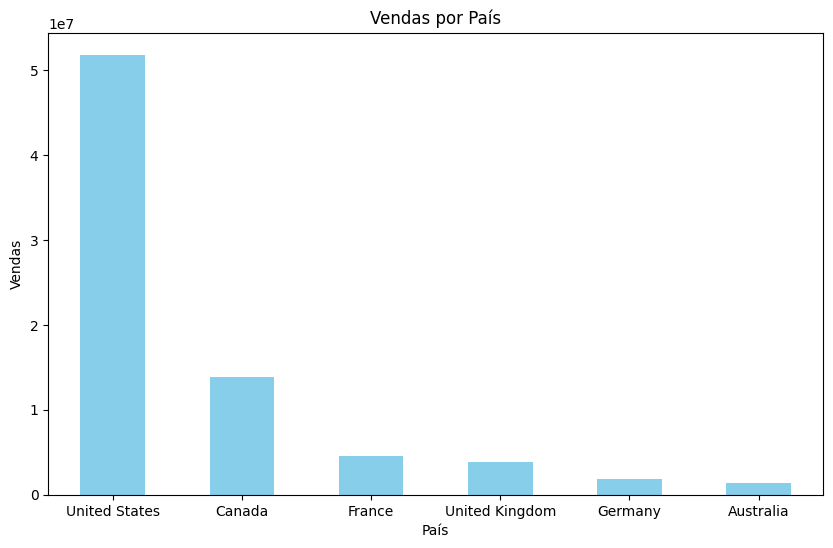

In [69]:
plt.figure(figsize=(10, 6))
vendas_pais.plot(kind='bar', color='skyblue')
plt.title('Vendas por País')
plt.xlabel('País')
plt.ylabel('Vendas')
plt.xticks(rotation=0)
plt.show()

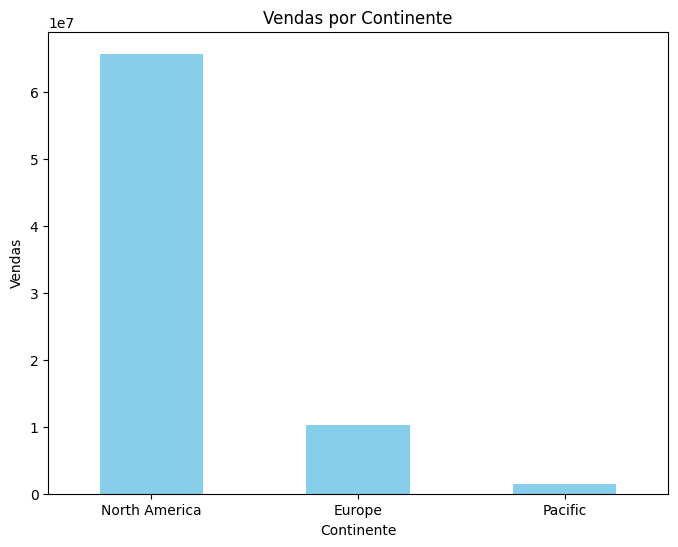

In [71]:
plt.figure(figsize=(8, 6))
vendas_continente.plot(kind='bar', color='skyblue')
plt.title('Vendas por Continente')
plt.xlabel('Continente')
plt.ylabel('Vendas')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Identificar os produtos mais vendidos em termos de quantidade

In [73]:
produtos_qtd = dados.groupby("Product")['Quantity'].sum().sort_values(ascending=False).head(10)

In [74]:
# Visualizar os produtos mais vendidos em termos de quantidade
print("Top 10 produtos mais vendidos em termos de quantidade:")
print(produtos_qtd)

Top 10 produtos mais vendidos em termos de quantidade:
Product
AWC Logo Cap                       5903
Long-Sleeve Logo Jersey, L         5899
Sport-100 Helmet, Blue             4412
Sport-100 Helmet, Black            4238
Sport-100 Helmet, Red              3865
Classic Vest, S                    3696
Full-Finger Gloves, L              3365
Short-Sleeve Classic Jersey, XL    3159
Long-Sleeve Logo Jersey, M         3084
Half-Finger Gloves, M              2810
Name: Quantity, dtype: int64


In [ ]:
# Analisar a demanda por diferentes produtos
# Podemos criar um gráfico de barras para visualizar a quantidade vendida por produto

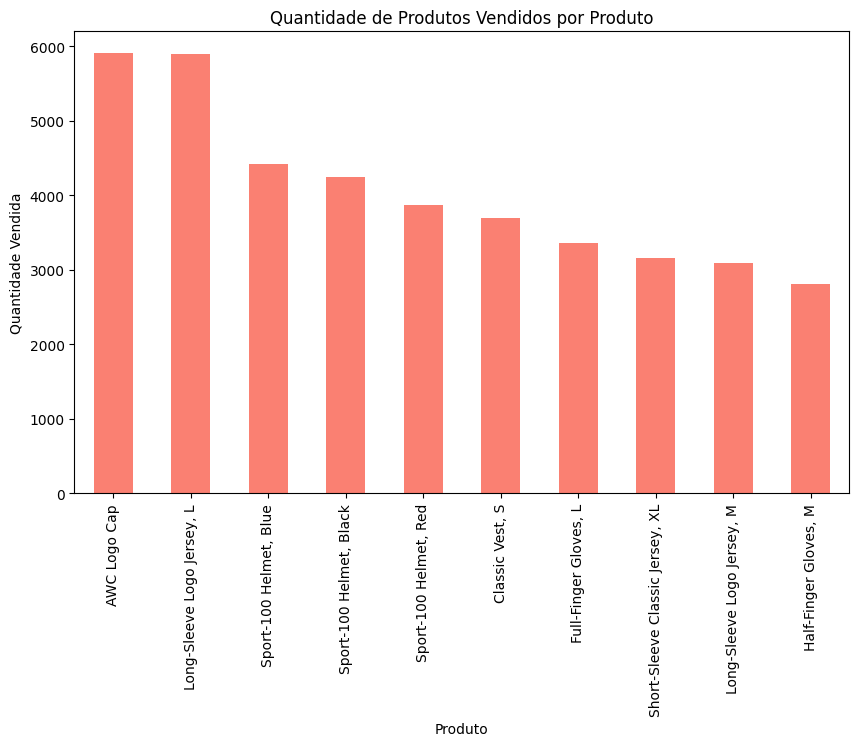

In [76]:
plt.figure(figsize=(10, 6))
produtos_qtd.plot(kind='bar', color='salmon')
plt.title('Quantidade de Produtos Vendidos por Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Análise da variação dos preços dos produtos ao longo do tempo
# Vamos agrupar os dados por mês e calcular o preço unitário médio

In [80]:
variacao_precos_mensal = dados.resample('M', on='OrderDate')['Unit Price'].mean()

In [81]:
# Visualizar a variação dos preços dos produtos ao longo do tempo
print("Variação dos preços dos produtos ao longo do tempo:")
print(variacao_precos_mensal)

Variação dos preços dos produtos ao longo do tempo:
OrderDate
2017-07-31    655.587102
2017-08-31    758.934866
2017-09-30    741.850169
2017-10-31    677.452906
2017-11-30    752.305561
2017-12-31    734.582167
2018-01-31    808.940557
2018-02-28    896.795346
2018-03-31    863.541501
2018-04-30    732.249838
2018-05-31    761.301691
2018-06-30    552.945934
2018-07-31    350.739489
2018-08-31    372.746856
2018-09-30    365.296160
2018-10-31    381.995583
2018-11-30    412.478977
2018-12-31    407.077182
2019-01-31    428.872767
2019-02-28    488.753984
2019-03-31    450.026379
2019-04-30    369.778047
2019-05-31    400.513612
2019-06-30    390.323740
2019-07-31    350.553591
2019-08-31    342.194403
2019-09-30    343.404806
2019-10-31    378.645851
2019-11-30    395.802462
2019-12-31    412.522146
2020-01-31    433.501281
2020-02-29    477.836652
2020-03-31    485.267970
2020-04-30    378.907334
2020-05-31    391.853541
Freq: M, Name: Unit Price, dtype: float64


In [ ]:
# Visualizar o valor da variação dos preços mensais

In [82]:
variacao_precos_mensal.diff()

OrderDate
2017-07-31           NaN
2017-08-31    103.347764
2017-09-30    -17.084698
2017-10-31    -64.397263
2017-11-30     74.852655
2017-12-31    -17.723394
2018-01-31     74.358390
2018-02-28     87.854789
2018-03-31    -33.253846
2018-04-30   -131.291663
2018-05-31     29.051853
2018-06-30   -208.355757
2018-07-31   -202.206445
2018-08-31     22.007366
2018-09-30     -7.450695
2018-10-31     16.699423
2018-11-30     30.483393
2018-12-31     -5.401794
2019-01-31     21.795585
2019-02-28     59.881217
2019-03-31    -38.727606
2019-04-30    -80.248332
2019-05-31     30.735565
2019-06-30    -10.189873
2019-07-31    -39.770149
2019-08-31     -8.359188
2019-09-30      1.210403
2019-10-31     35.241045
2019-11-30     17.156611
2019-12-31     16.719684
2020-01-31     20.979135
2020-02-29     44.335371
2020-03-31      7.431317
2020-04-30   -106.360635
2020-05-31     12.946206
Freq: M, Name: Unit Price, dtype: float64

In [ ]:
# Identificar produtos com preços unitários mais altos ou mais baixos

In [84]:
preco_produto_alto = dados.groupby("Product")["Unit Price"].max().sort_values(ascending=False).head(10)
preco_produto_baixo = dados.groupby("Product")["Unit Price"].min().sort_values(ascending=False).head(10)

In [85]:
# Visualizar os produtos com preços unitários mais altos e mais baixos
print("\nProdutos com preços unitários mais altos:")
print(preco_produto_alto)
print("\nProdutos com preços unitários mais baixos:")
print(preco_produto_baixo)


Produtos com preços unitários mais altos:
Product
Road-150 Red, 62           2146.96
Road-150 Red, 56           2146.96
Road-150 Red, 52           2146.96
Road-150 Red, 48           2146.96
Road-150 Red, 44           2146.96
Mountain-100 Silver, 48    2039.99
Mountain-100 Silver, 44    2039.99
Mountain-100 Silver, 38    2039.99
Mountain-100 Silver, 42    2039.99
Mountain-100 Black, 38     2024.99
Name: Unit Price, dtype: float64

Produtos com preços unitários mais baixos:
Product
Road-150 Red, 52         2146.96
Road-150 Red, 44         2146.96
Road-150 Red, 48         2146.96
Road-150 Red, 56         2146.96
Road-150 Red, 62         2146.96
Road-250 Red, 52         1466.01
Touring-1000 Blue, 54    1430.44
Touring-1000 Blue, 50    1430.44
Road-250 Red, 48         1417.14
Road-250 Red, 44         1343.84
Name: Unit Price, dtype: float64


In [ ]:
#Suponha que você queira visualizar a média dos preços dos produtos por
#trimestre para analisar padrões sazonais. Aqui está como você pode fazer isso:

In [88]:
dados['trimestre'] = dados['OrderDate'].dt.to_period('T')

In [94]:
media_trimestre = dados.groupby('trimestre')['Unit Price'].mean().sample(10)

In [95]:
# Visualizar a média dos preços dos produtos por trimestre
print("Média dos preços dos produtos por trimestre:")
print(media_trimestre)

Média dos preços dos produtos por trimestre:
trimestre
2019-01-08 00:00    761.951600
2019-10-22 00:00    401.372256
2019-07-16 00:00    347.948913
2020-03-06 00:00    640.912424
2019-01-03 00:00    189.866667
2019-04-12 00:00    407.390541
2018-07-28 00:00    281.087838
2019-12-19 00:00    398.187259
2018-06-28 00:00    619.635000
2018-07-13 00:00    267.006935
Freq: T, Name: Unit Price, dtype: float64


In [ ]:
# Vamos plotar um gráfico de linha para visualizar a tendência dos preços dos produtos ao longo do tempo

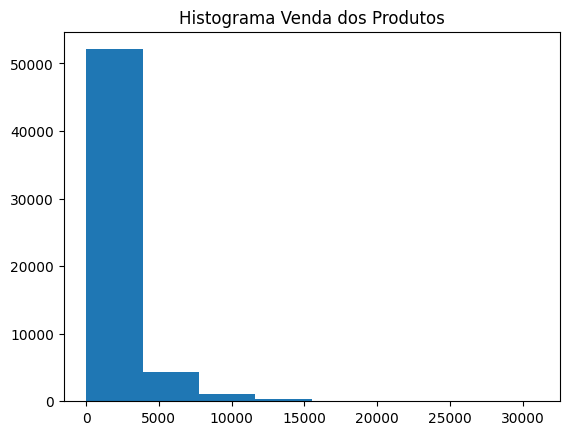

In [112]:
plt.hist(dados.Sales, bins=8)
plt.title("Histograma Venda dos Produtos");

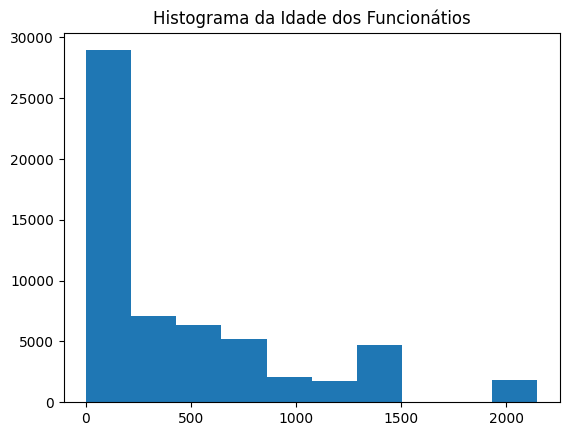

In [110]:
plt.hist(dados["Unit Price"], bins=10)
plt.title("Histograma dos preços Unitários");

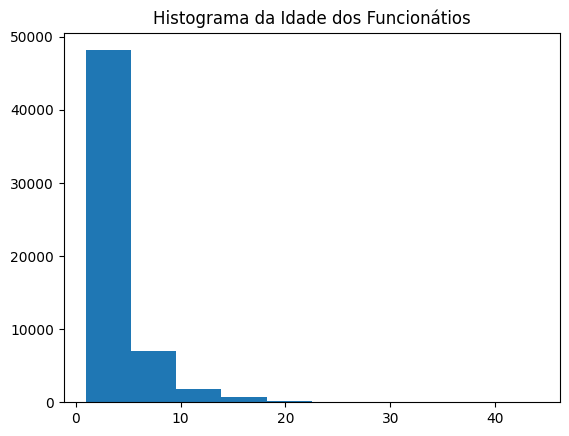

In [111]:
plt.hist(dados["Quantity"], bins=10)
plt.title("Histograma da quantidade dos produtos na BD");

In [97]:
# Calculando a correlação de Pearson entre os preços dos produtos e as vendas correspondentes
correlation = dados['Unit Price'].corr(dados['Sales'])
# Visualizando a correlação
print("Correlação entre preços e vendas:", correlation)


Correlação entre preços e vendas: 0.7210051451890267


In [99]:
corrdados = dados[['Unit Price', 'Sales', 'Quantity']]

In [100]:
corrdados.corr()

,Unit Price,Sales,Quantity
Unit Price,1.000000,0.721005,-0.148012
Sales,0.721005,1.000000,0.237600
Quantity,-0.148012,0.237600,1.000000


In [ ]:
#Imprmir um relatorio automatizado com a biblioteca Ydata

In [104]:
profile = ProfileReport(dados)

profile.to_file("/content/Report_data.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]